<a href="https://colab.research.google.com/github/hkaragah/google_colab_repo/blob/main/hands_on_ml_exercises/06_decision_tree_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regressor

__Disclaimer:__ This exercise is adopted from `"Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (Third Edition)"` book written by `_Aurelien Geron_` publoshed by `_O'Reilly_`. I broke them down into smaller digestable snippets, made some modifications, and added some explanations so that I can undersatand them better. The porpuse of this notebook is just for me to understand the concept and have hands-on practice while reading the book material.

## Objective
Apply decision tree for regression tasks

## Load Dataset

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import StandardScaler
from graphviz import Source
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [107]:
np.random.seed(42)
X = np.random.rand(200, 1) - 0.5
y = X ** 2 + 0.025 * np.random.randn(200, 1)

print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")

Feature shape: (200, 1)
Target shape: (200, 1)


## Define and Train Model

In [108]:
tree_clf1 = DecisionTreeRegressor(random_state=42)
tree_clf2 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_clf3 = DecisionTreeRegressor(random_state=42, max_depth=3)

tree_clf1.fit(X, y)
tree_clf2.fit(X, y)
tree_clf3.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

## Visualize Tree

In [10]:
def plot_tree(tree_clf, size):
    # Create and export .dot file
    export_graphviz(
            tree_clf,
            out_file= 'file.dot',
            rounded=True,
            filled=True)

    # Read .dot file and create Source object
    with open('file.dot') as f:
        dot_graph = f.read()

    # Modify .dot file and add graph size
    dot_graph = dot_graph.replace('digraph Tree {', f'digraph Tree {{\ngraph [size="{size}"];')

    # Create a Source object from the modified string
    src = Source(dot_graph)

    # Display .dot file
    return src

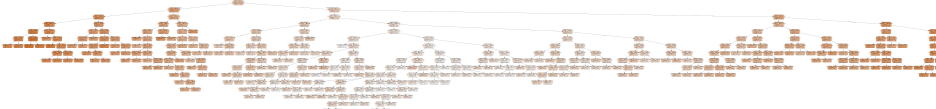

In [109]:
plot_tree(tree_clf1, "13,13!")


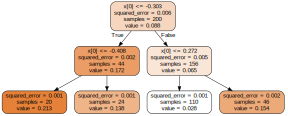

In [110]:
plot_tree(tree_clf2, "4,4!")

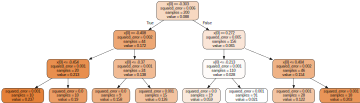

In [134]:
plot_tree(tree_clf3, "5,5!")

In [136]:
# import sklearn
# help(sklearn.tree._tree.Tree)

## Plot Decision Boundary

In [181]:
def plot_decision_boundary(clf, X, y, ax, threshold_on=False):
    n = 500
    x = np.linspace(X[:,0].min() - 0.5, X[:,0].max() + 0.5, n).reshape(-1,1)
    y_pred = clf.predict(x)
    sns.lineplot(x=x.ravel(), y=y_pred, ax=ax, color='#C80036', linewidth=2)

    if threshold_on:

        tree = clf.tree_
        internal_nodes = [i for i in range(tree.node_count) if tree.children_left[i] != -1]
        thresholds = tree.threshold[internal_nodes]

        for i in range(len(thresholds)):
            ax.axvline(x=thresholds[i], color='black', linestyle=':', linewidth=1)
            ax.text(x=thresholds[i]+0.01, y=y.max()-0.01, s=f"Depth {i}", rotation='vertical', **dict(size=8))



def plot_points(X, y, ax, title, marker="h", color="#03346E", s=60, alpha=0.7):
    sns.scatterplot(x=X[:,0], y=y[:,0], ax=ax, marker=marker, color=color, s=s, edgecolor='k', alpha=alpha)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$", rotation=0)
    ax.set_xlim(X[:,0].min() - 0.05, X[:,0].max() + 0.05)
    ax.set_ylim(y.min() - 0.05, y.max() + 0.05)
    ax.set_title(title, fontsize=10)
    # ax.grid(True)

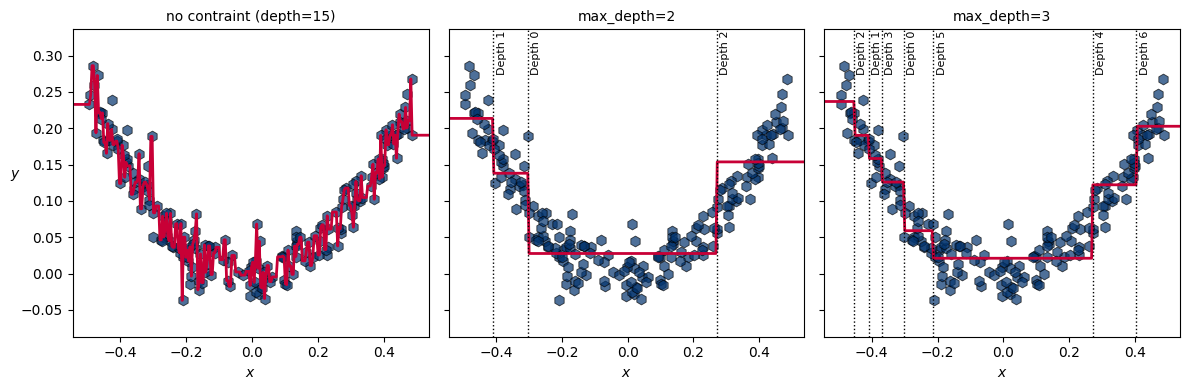

In [182]:
clfs = [tree_clf1, tree_clf2, tree_clf3]
titles = [f'no contraint (depth={tree_clf1.tree_.max_depth})', 'max_depth=2', 'max_depth=3']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)

for clf, ax, title in zip(clfs, axes, titles):
    threshold_on = True if 'max_depth' in title else False
    plot_points(X, y, ax, title)
    plot_decision_boundary(clf, X, y, ax, threshold_on)

plt.tight_layout()
plt.show()

Obviously, the model with no contraint is highly overfitted the training set.